# 第2章 確率分布と統計モデルの最尤推定

Q. 確率分布とは？


## 2.1.例題：種子数の統計モデリング
* データの特徴は、後で確率分布を選ぶときの手がかりとなる
* データ解析で最も重要なのは、そのデータを様々な方法で図示してみること 

* データは[こちら](http://hosho.ees.hokudai.ac.jp/~kubo/ce/IwanamiBook.html)

* RDataが読み込めなくなったため、[こちら](https://stackoverflow.com/questions/13189467/how-to-convert-rdata-format-into-text-file-format)を参考にR上でcsvファイル(chap2_data.csv)を作成した後、Pythonで読み込んでいる。


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sct
# from rpy2.robjects import r #Rインストール後動かなくなってしまった。
%matplotlib inline

### データを読み込んで表示する

In [2]:
data =pd.read_csv("chap2_data.csv").x

# r['load']('data.RData')
# data = pd.Series(np.array(r['data']))

In [3]:
data

0     2
1     2
2     4
3     6
4     4
5     5
6     2
7     3
8     1
9     2
10    0
11    4
12    3
13    3
14    3
15    3
16    4
17    2
18    7
19    2
20    4
21    3
22    3
23    3
24    4
25    3
26    7
27    5
28    3
29    1
30    7
31    6
32    4
33    6
34    5
35    2
36    4
37    7
38    2
39    2
40    6
41    2
42    4
43    5
44    4
45    5
46    1
47    3
48    2
49    3
Name: x, dtype: int64

### データの個数を数える

50

### データを要約せよ

count    50.00000
mean      3.56000
std       1.72804
min       0.00000
25%       2.00000
50%       3.00000
75%       4.75000
max       7.00000
Name: x, dtype: float64

### 度数分布を作成

(array([ 1,  3, 11, 12, 10,  5,  8]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]))

### ヒストグラムの図示

(array([  1.,   3.,  11.,  12.,  10.,   5.,   4.,   4.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5]),
 <a list of 8 Patch objects>)

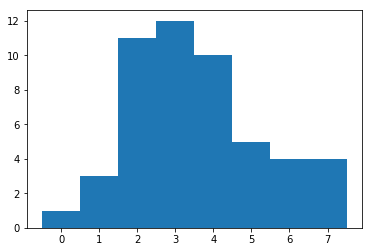

### 標本分散

2.9861224489795921

### 標準偏差
* 下記の2つの求め方がある

1.7280400600042789

1.7280400600042789

## 2.2.データと確率分布の対応関係を眺める
* ポアソン分布

Q. 確率分布とは？


Q. パラメーターとは？

Q. ポアソン分布で指定できるパラメーターは？

### 平均3.56のポアソン分布を作成する
* ひとまず、図示してみよう。

array([ 0.02843882,  0.10124222,  0.18021114,  0.21385056,  0.190327  ,
        0.13551282,  0.08040427,  0.04089132,  0.01819664,  0.00719778])

### グラフにする

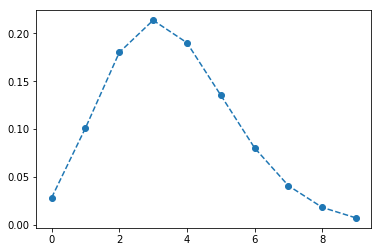

### 前述のヒストグラムとポアソン分布を重ねて表示する

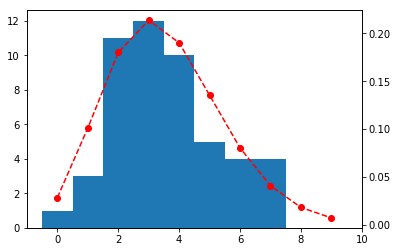

* 観察されたばらつきがポアソン分布で表現できてるみたいだなぁ。
* 図の見た目による納得気分をもう少し定量的に示す方法を考える。
    * どのような確率分布、統計モデルを使って与えられた観測データを説明できるのか
    * 観測データを説明できる良い統計モデルとは何か。

## 2.3.ポアソン分布とは何か？
Q. ポアソン分布の定義(数式)は？

Q. ポアソン分布の性質は？(3つ)

## 2.4.ポアソン分布のパラメーターの最尤推定
* 確率分布のパラメーターを、観測データに基づいて推定する方法について

Q. 最尤推定法とは？

Q. 例題の尤度$L(\lambda)$の計算式は？

Q. 上記を対数変換した対数尤度関数は？

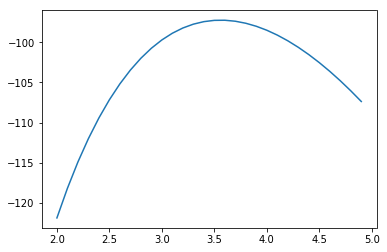

Q. 最尤推定量とは？

* 実際のデータ解析で使う統計モデルはもっと複雑になるため、簡単には最尤推定量を導出できない

### 2.4.1.擬似乱数と最尤推定値のばらつき

#### ポアソン乱数を発生させる
* 平均3.5のポアソン乱数を50個発生させる

(array([  1.,   5.,   9.,  14.,  11.,   7.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 <a list of 6 Patch objects>)

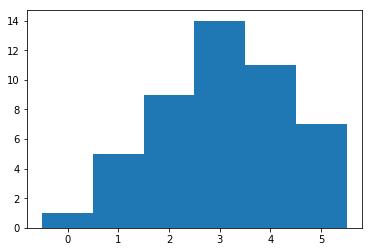

* 発生させた50個の平均を見てみる。

3.2599999999999998

* 平均3.5のポアソン分布から発生させた50個の乱数。その平均は上記となり、ズレが発生する。

#### ランダムに最尤推定値を3000回計算する

* 平均値が3.5のポアソン乱数を50個発生させる
* その平均（最尤推定値）をとる。
* これを3000回繰り返す。

(0, 1500)

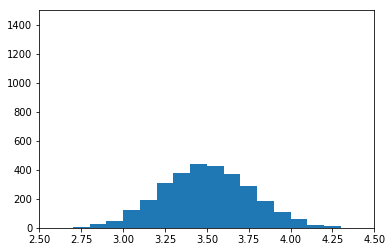

* 本来であれば、平均値が3.5のポアソン乱数を発生させているため、その最尤推定値も3.5になるはず。（自然が持つ情報）
* しかし上記の通り、ばらつきがある。これはデータが50個体分しかないから。（観測データ）
* 推定値のばらつきを標準誤差と呼ぶ。
* 調査個体数が大きいほど推定値の標準誤差は小さくなる。実際に試してみると下記。

#### データを500個にし、3000回計算する

(0, 1500)

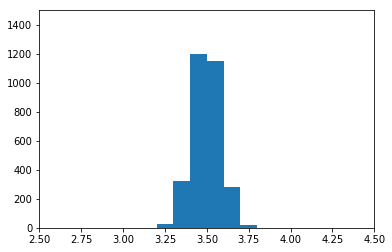

* 個体が増えたため、ばらつきが減った。
* ここで使った方法は真のモデルを知ってなければ使えない。推定値のばらつきを見積もるには、たまたま得られた観測データから推定された値にすぎない$\hat{\lambda}$を利用して乱数を発生させる。

## 2.5.統計モデルの要点：乱数発生・推定・予測

1. ばらつきのあるデータを見た時に「確率分布から発生したと考えれば扱いやすそうだ」と考えることが統計モデリングの第一歩
2. 確率分布を仮定する（ポアソン分布など）
3. 推定、あてはめ：パラメーター$\lambda$はどんな値か
4. 予測：推定で得られた統計モデルを用いて次のデータの分布を見積もる
    1. 次に得られる応答変数の平均だけを示す
    2. 平均だけでなく、次に得られるデータはこの範囲に散らばるはずという予測区間も示す
5. 検証：予測の良さ（推定されたモデルが新しく得られたデータにどれぐらいよく当てはまるか）

### 2.5.1.データ解析に置ける推定・予測の役割

* 推定されたモデルを使って予測するためには、自分が使っている統計モデルをよく理解していなければならない。
* 推定結果を図示することが重要
* 科学で使われるモデルの良さとは、そのモデルの予測の良さによって決まります。また、推定されたモデルによる予測を試みることで、自分が使っている近似的・現象論的な統計モデルの理解が深まり、またその不備が判明することもあります。
* 推定したモデルによる予測は重要。推定しただけ、あるいは「検定」しただけでは十分とは言えない


## 2.6.確率分布の選び方
|  | 離散・連続 | 範囲 |標本分散、標本平均の関係|
|:-----------|------------:|:------------:|:------------:|
|  ポアソン分布      | |  | |
|  二項分布      | |  | |
|  正規分布      | |  | |
|  ガンマ分布      | |  | | |

### 2.6.1.もっと複雑な確率分布が必要か？
* そんなに多種類の確率分布を使いこなさなくても良い。統計モデリングの工夫次第
* 「データ化されていない個体差、見なかった個体差」がある場合には、確率分布を混ぜ合わせることで解決。

## 2.7. この章のまとめと参考文献
* 確率分布には様々なものがあるので、データの特徴に合わせて確率分布を選ぶ
* どのような確率分布を使った統計モデルでも、「データに対するあてはまりの良さ」を対数尤度であらわすことができ、最尤推定とは対数尤度を最大にするようなパラメーターを探し出すことである
* 推定とは、今得られたデータに当てはまるようなパラメータを探し出すこと。予測とは、次に得られるデータへの当てはまりを重視すること。
* 簡単な確率分布を「混ぜ合わせる」ことで、現実に見られる複雑なばらつきに対処できる

## 課題
* ポアソン分布と考えられそうなデータを見つけ、推定用、予測用(検証用)に分割する。
* 推定用のデータを用いて、ポアソン分布のパラメータの推定を行う
* 予測用データに対して予測を行い、当てはまりの良さを確認する